In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from src.code_parser import parse_data_frame

path = Path("SemEval-2026-Task13")
dir_paths = {name: path / f"task_{name}" for name in ["a", "b", "c"]}
datasets = {
    name: {
        "training": dir_paths[name] / f"task_{name}_training_set.parquet"
        if name == "b"
        else dir_paths[name] / f"task_{name}_training_set_1.parquet",
        "validation": dir_paths[name] / f"task_{name}_validation_set.parquet",
        "test": dir_paths[name] / f"task_{name}_test_set_sample.parquet",
    }
    for name in ["a", "b", "c"]
}
data = pd.read_parquet(datasets["b"]["training"]).sample(3_000)
data["word_count"] = data["code"].str.split().str.len()
data["tree_len"] = [len(x) for x in parse_data_frame(data)]

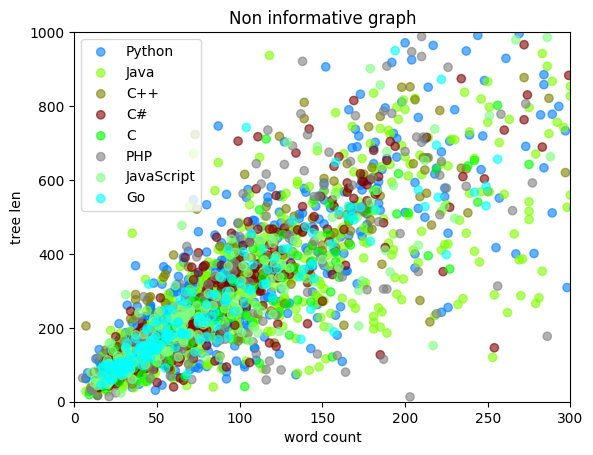

In [3]:
def get_rgb(lang):
    match lang:
        case 'Python':
            return 0, 0.5, 1, 0.5
        case 'Java':
            return 0.5, 1, 0, 0.5
        case 'C':
            return 0, 1, 0, 0.5
        case 'C++':
            return 0.5, 0.5, 0, 0.5
        case 'C#':
            return 0.5, 0, 0, 0.5
        case 'PHP':
            return 0.5, 0.5, 0.5, 0.5
        case 'JavaScript':
            return 0.5, 1, 0.5, 0.5
        case 'Go':
            return 0, 1, 1, 0.5
    return 0, 0, 0, 0.5

for language in [
    "Python", "Java", "C++", "C#", "C", "PHP", "JavaScript", "Go",
    ]:
    language_data = data[data['language'] == language]
    plt.scatter(language_data["word_count"], language_data["tree_len"], c=list(map(get_rgb, language_data['language'])), label=language, alpha=0.6)
plt.xlim((0, 300))
plt.ylim((0, 1000))
plt.title('Non informative graph')
plt.xlabel('word count')
plt.ylabel('tree len')
plt.legend()
plt.show()